In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

In [2]:
# Load the datasets
def load_data():
    train_df = pd.read_csv('../data/raw/Train.csv')
    waste_df = pd.read_csv('../data/raw/waste_management.csv')
    toilets_df = pd.read_csv('../data/raw/toilets.csv')
    water_df = pd.read_csv('../data/raw/water_sources.csv')
    return train_df, waste_df, toilets_df, water_df

train_df, waste_df, toilets_df, water_df = load_data()

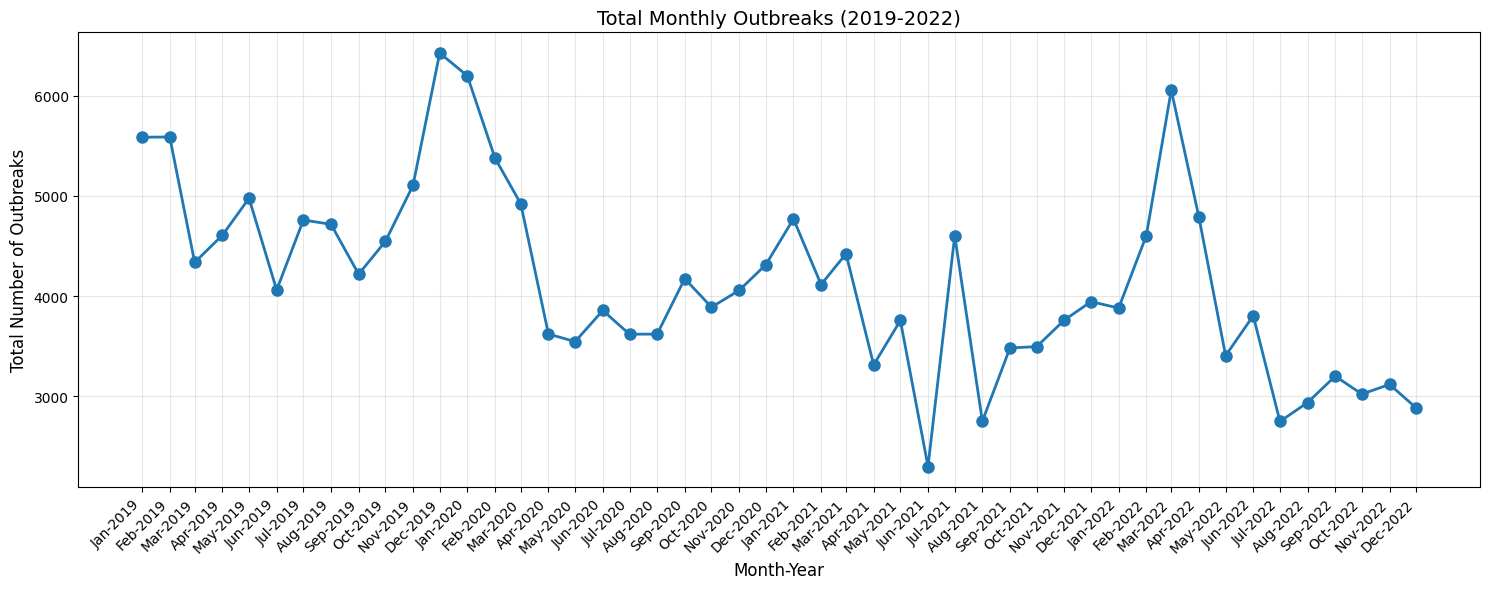

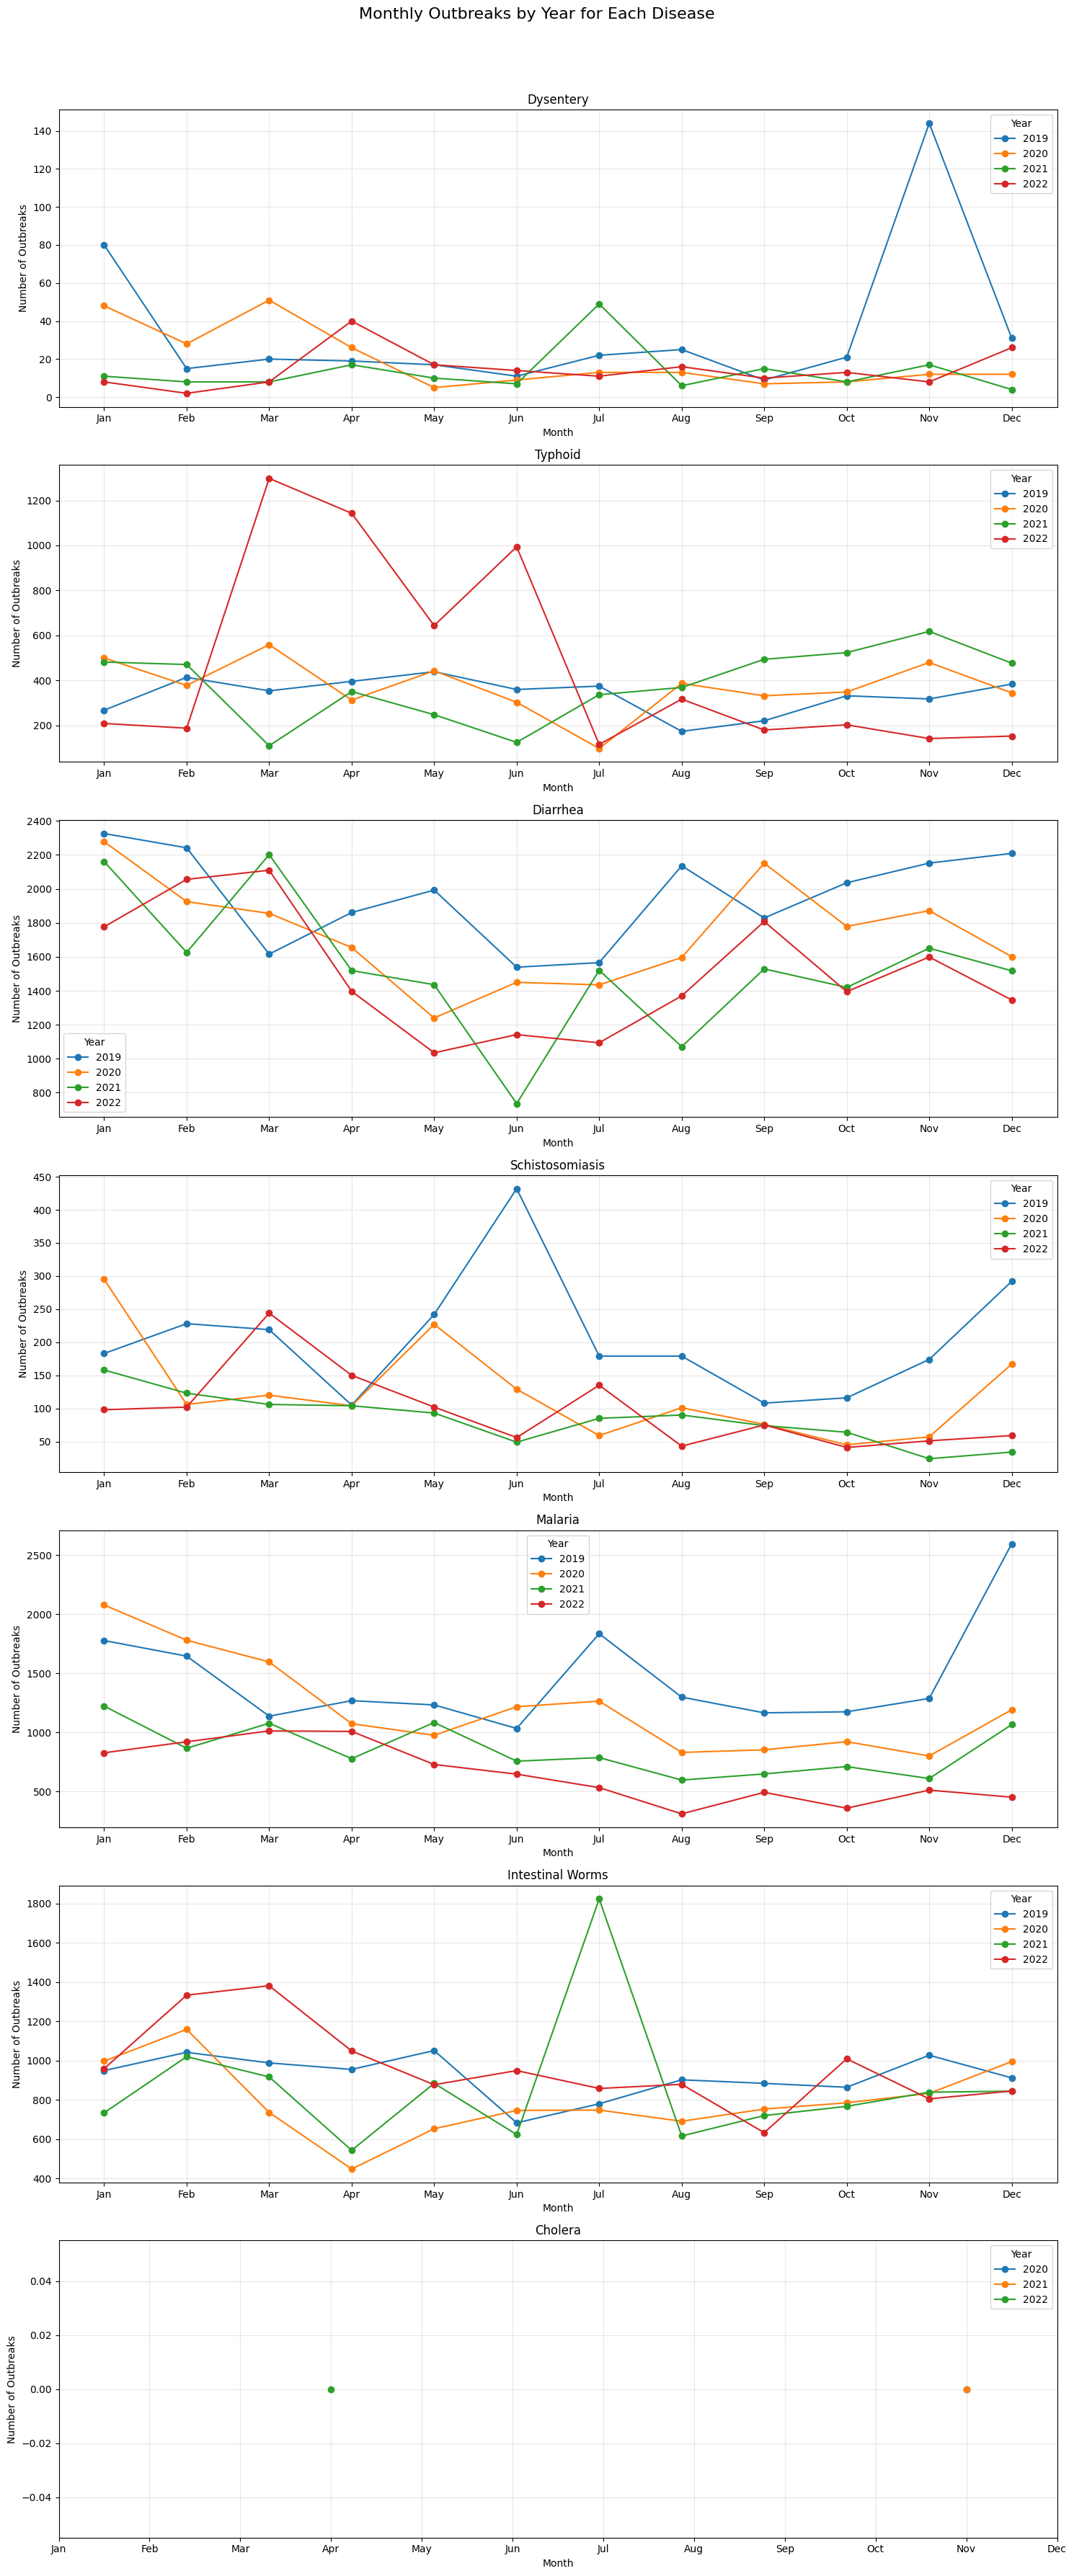

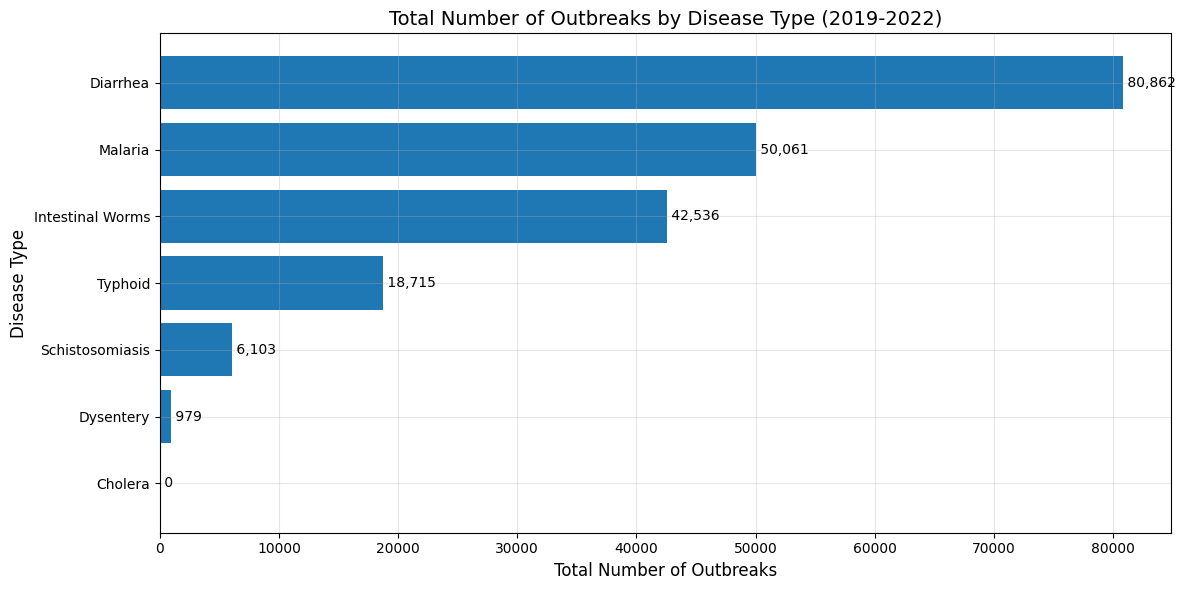

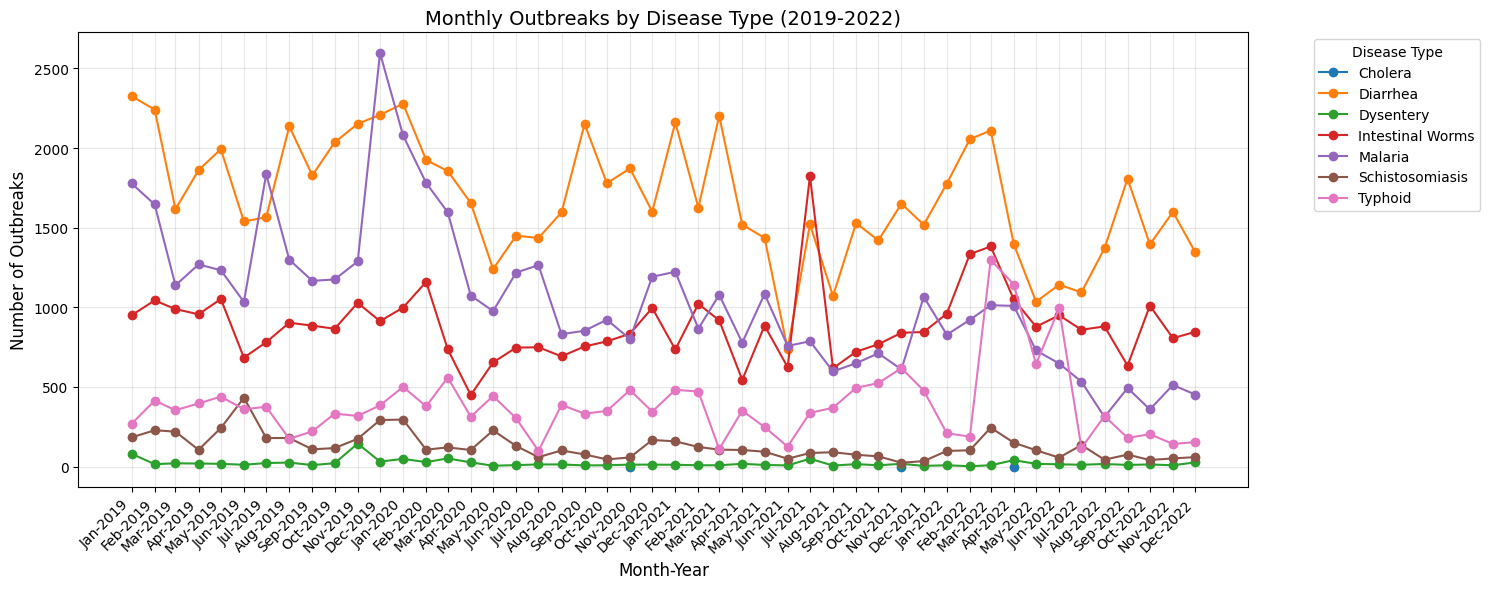

In [3]:
# Analyze Time Series Data
def analyze_time_series(df):
    # Convert Year-Month to datetime for proper sorting
    df['Year-Month'] = pd.to_datetime(df[['Year', 'Month']].assign(Day=1))
    
    # 1. All time monthly outbreaks (2019-2022)
    plt.figure(figsize=(15, 6))
    monthly_outbreaks = df.groupby('Year-Month')['Total'].sum()
    plt.plot(monthly_outbreaks.index, monthly_outbreaks.values, 
            marker='o', linewidth=2, markersize=8)
    
    # Formatting x-axis to show all months
    plt.xticks(monthly_outbreaks.index, 
               [d.strftime('%b-%Y') for d in monthly_outbreaks.index],
               rotation=45, ha='right')
    plt.title('Total Monthly Outbreaks (2019-2022)', fontsize=14)
    plt.xlabel('Month-Year', fontsize=12)
    plt.ylabel('Total Number of Outbreaks', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 2. Monthly outbreaks by year for each disease
    diseases = df['Disease'].unique()
    years = df['Year'].unique()
    
    # Create a figure with subplots for each disease
    fig, axes = plt.subplots(len(diseases), 1, figsize=(15, 5*len(diseases)))
    fig.suptitle('Monthly Outbreaks by Year for Each Disease', fontsize=16, y=1.02)
    
    for idx, disease in enumerate(diseases):
        disease_data = df[df['Disease'] == disease]
        yearly_monthly = disease_data.pivot_table(
            index='Month',
            columns='Year',
            values='Total',
            aggfunc='sum'
        )
        
        yearly_monthly.plot(marker='o', ax=axes[idx])
        axes[idx].set_xticks(range(1, 13))
        axes[idx].set_xticklabels(calendar.month_abbr[1:], rotation=0)
        axes[idx].set_title(f'{disease}', fontsize=12)
        axes[idx].set_xlabel('Month', fontsize=10)
        axes[idx].set_ylabel('Number of Outbreaks', fontsize=10)
        axes[idx].legend(title='Year')
        axes[idx].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

    # 3. Total outbreaks by disease type (all time)
    plt.figure(figsize=(12, 6))
    disease_totals = df.groupby('Disease')['Total'].sum().sort_values(ascending=True)
    
    # Create bar plot
    bars = plt.barh(range(len(disease_totals)), disease_totals.values)
    plt.yticks(range(len(disease_totals)), disease_totals.index)
    
    # Add value labels on the bars
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width, i, f' {int(width):,}', 
                va='center', fontsize=10)
    
    plt.title('Total Number of Outbreaks by Disease Type (2019-2022)', fontsize=14)
    plt.xlabel('Total Number of Outbreaks', fontsize=12)
    plt.ylabel('Disease Type', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Additional: Monthly average outbreaks by disease type
    plt.figure(figsize=(15, 6))
    monthly_disease_avg = df.pivot_table(
        index='Year-Month',
        columns='Disease',
        values='Total',
        aggfunc='sum'
    )
    
    plt.plot(monthly_disease_avg.index, monthly_disease_avg.values, marker='o', linestyle='-')
    plt.xticks(monthly_disease_avg.index, 
               [d.strftime('%b-%Y') for d in monthly_disease_avg.index],
               rotation=45, ha='right')
    plt.title('Monthly Outbreaks by Disease Type (2019-2022)', fontsize=14)
    plt.xlabel('Month-Year', fontsize=12)
    plt.ylabel('Number of Outbreaks', fontsize=12)
    plt.legend(monthly_disease_avg.columns, title='Disease Type', 
              bbox_to_anchor=(1.05, 1))
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

analyze_time_series(train_df)